<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Graph Attention Network (GAT) GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class GAT(torch.nn.Module):
    
    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(GAT, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.in_gat1_layer = GATConv(num_n_feature, emb_size)
        self.gat2 = GATConv(emb_size, emb_size)

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)

    def forward(self, x, edges_idx, batch_idx, g_features):

        x = self.in_gat1_layer(x, edges_idx)

        x = self.gat2(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)
        
        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out

# Training

In [4]:
models = train_all_and_optimize(GAT, datasets, epochs = 60)

[I 2022-01-07 11:14:10,659] A new study created in memory with name: no-name-a0e8b68e-6004-4bfe-b368-057f5710742a


--> Train on: origin


[I 2022-01-07 11:14:57,041] Trial 0 finished with value: 0.9315257352941176 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.9315257352941176.
[I 2022-01-07 11:15:24,150] Trial 1 finished with value: 0.9300551470588235 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.9315257352941176.
[I 2022-01-07 11:15:40,987] Trial 2 finished with value: 0.9167279411764706 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.9315257352941176.
[I 2022-01-07 11:15:59,028] Trial 3 finished with value: 0.9599609375 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 3 with value: 0.9599609375.
[I 2022-01-07 11:16:19,539] Trial 4 finished with value: 0.924172794117647

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.2464835693438848  loss_val=0.3685745596885681 | acc_train=0.8998927696078431  acc_val=0.8767233455882353
Epochs: 20 | loss_train=0.19469558695952097  loss_val=0.2077910304069519 | acc_train=0.9178538602941176  acc_val=0.9217026654411764
Epochs: 30 | loss_train=0.209270179271698  loss_val=0.1332807019352913 | acc_train=0.9289598651960785  acc_val=0.9520909926470589
Epochs: 40 | loss_train=0.18093792100747427  loss_val=0.23760909587144852 | acc_train=0.9237132352941176  acc_val=0.9236557904411764
Epochs: 50 | loss_train=0.1598461071650187  loss_val=0.1372554823756218 | acc_train=0.9374234068627452  acc_val=0.9658203125
Epochs: 60 | loss_train=0.20900479952494302  loss_val=0.15830596908926964 | acc_train=0.9266620710784315  acc_val=0.958984375


[I 2022-01-07 11:18:04,675] A new study created in memory with name: no-name-8ee7df78-c2df-4ca8-85c1-d5a007963c25


--> Train on: dataset1


[I 2022-01-07 11:18:30,609] Trial 0 finished with value: 0.9018382352941176 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.9018382352941176.
[I 2022-01-07 11:18:57,116] Trial 1 finished with value: 0.9172028186274509 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.9172028186274509.
[I 2022-01-07 11:19:21,672] Trial 2 finished with value: 0.8845741421568628 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.9172028186274509.
[I 2022-01-07 11:19:45,370] Trial 3 finished with value: 0.9001991421568628 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.9172028186274509.
[I 2022-01-07 11:20:03,056] Trial 4 finished with value:

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.2686021692223019  loss_val=0.305046808719635 | acc_train=0.8737234477124183  acc_val=0.8705882352941176
Epochs: 20 | loss_train=0.1961529536379708  loss_val=0.24472005069255828 | acc_train=0.9196793300653595  acc_val=0.9104779411764706
Epochs: 30 | loss_train=0.19236071407794952  loss_val=0.18915224224328994 | acc_train=0.9237642973856209  acc_val=0.9390625
Epochs: 40 | loss_train=0.17541093793180254  loss_val=0.2041266977787018 | acc_train=0.9269301470588235  acc_val=0.9151654411764707
Epochs: 50 | loss_train=0.12892326547039878  loss_val=0.2004100650548935 | acc_train=0.9569035947712418  acc_val=0.9226102941176471
Epochs: 60 | loss_train=0.13284271458784738  loss_val=0.1720412090420723 | acc_train=0.9487847222222222  acc_val=0.9351102941176471


[I 2022-01-07 11:22:30,084] A new study created in memory with name: no-name-73650c9b-cbb0-4e3f-99d4-e3414c2113ab


--> Train on: dataset2


[I 2022-01-07 11:22:49,415] Trial 0 finished with value: 0.8403033088235294 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8403033088235294.
[I 2022-01-07 11:23:19,460] Trial 1 finished with value: 0.8316865808823529 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 160}. Best is trial 0 with value: 0.8403033088235294.
[I 2022-01-07 11:23:34,648] Trial 2 finished with value: 0.8592026654411764 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 2 with value: 0.8592026654411764.
[I 2022-01-07 11:23:55,292] Trial 3 finished with value: 0.7787224264705883 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 2 with value: 0.8592026654411764.
[I 2022-01-07 11:24:20,625] Trial 4 finished with value: 0.831

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.19194074389007357  loss_val=0.20920320749282836 | acc_train=0.9204452614379084  acc_val=0.9167279411764706
Epochs: 20 | loss_train=0.15309364679786894  loss_val=0.22659359574317933 | acc_train=0.9421466503267973  acc_val=0.8971507352941176
Epochs: 30 | loss_train=0.13806374784972933  loss_val=0.22379209101200104 | acc_train=0.9542994281045751  acc_val=0.9030330882352942
Epochs: 40 | loss_train=0.1513739451766014  loss_val=0.1700332447886467 | acc_train=0.9349468954248366  acc_val=0.9359375
Epochs: 50 | loss_train=0.1457216739654541  loss_val=0.17189613580703736 | acc_train=0.9455167483660131  acc_val=0.9347426470588236
Epochs: 60 | loss_train=0.13353832893901402  loss_val=0.15954200327396392 | acc_train=0.9566993464052287  acc_val=0.9375


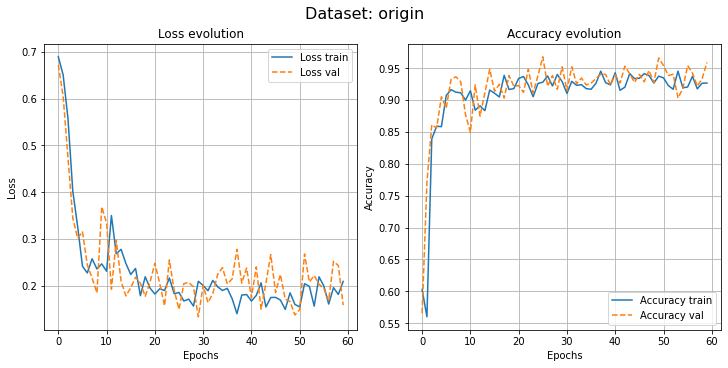

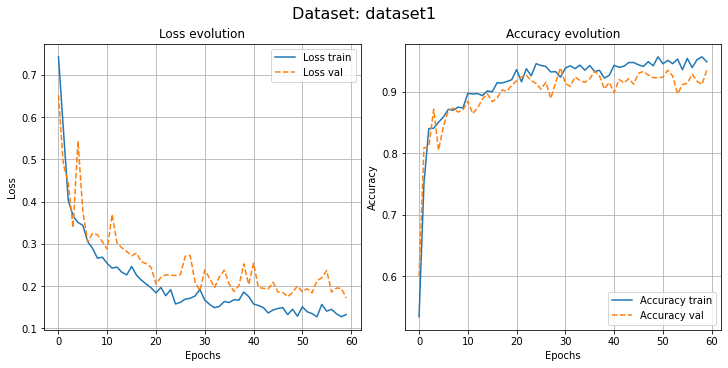

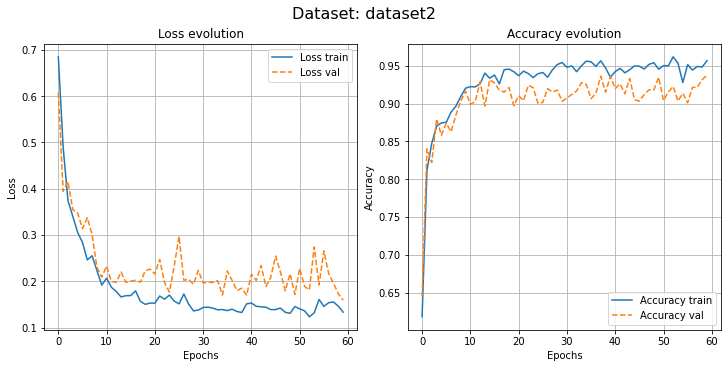

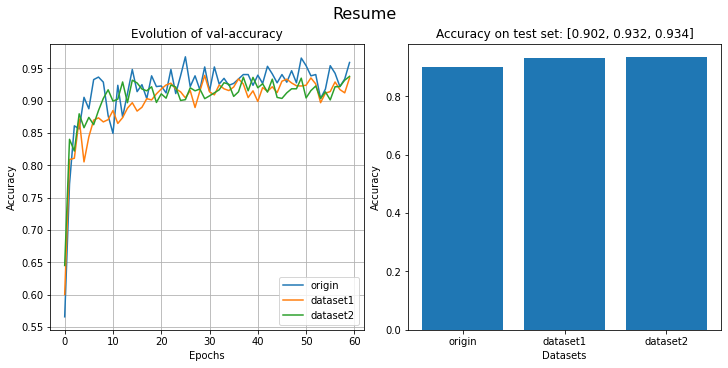

In [5]:
plot_hist(models)

# Save the three models

In [6]:
path = '../models/GAT/'
for name, model, _, _ in models:
    torch.save(model, f'{path}GAT_{name}')